# GRIP@ The Spark Foundation

# Task 3: Perform 'Exploratory Data Analytics-Retail' on dataset 'Sample Superstore'

# By: Arpita Bajaj

In [1]:
#Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Extracting Dataset

In [4]:
data=pd.read_csv("SampleSuperstore.csv")

In [5]:
#Showing first5 and last 5 rows.

In [6]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [7]:
data.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [8]:
data.shape

(9994, 13)

In [9]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [10]:
data.iloc[0:3,0:2]

,Ship Mode,Segment
0,Second Class,Consumer
1,Second Class,Consumer
2,Second Class,Corporate


In [11]:
#Data Cleaning- Removing null values, removingduplicate values

In [12]:
#Checking null values

In [13]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [14]:
#Checking datatypes

In [15]:
data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [16]:
#Dropping irrelevant columns
data=data.drop(['Ship Mode','Segment','Country','Region'],axis=1)
data.head()

,City,State,Postal Code,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Henderson,Kentucky,42420,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Henderson,Kentucky,42420,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Los Angeles,California,90036,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Fort Lauderdale,Florida,33311,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Fort Lauderdale,Florida,33311,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [17]:
#Renaming the column names

In [18]:
data=data.rename(columns={"Postal Code":"Code","Sub-Category":"Sub_Cat"})
data.head()

,City,State,Code,Category,Sub_Cat,Sales,Quantity,Discount,Profit
0,Henderson,Kentucky,42420,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Henderson,Kentucky,42420,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Los Angeles,California,90036,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Fort Lauderdale,Florida,33311,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Fort Lauderdale,Florida,33311,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [19]:
#Total number of rows and columns
data.shape

(9994, 9)

In [20]:
#Rows containing duplicate data
duplicate_rows_data = data[data.duplicated()]
print("Number of duplicate rows:",duplicate_rows_data.shape)

Number of duplicate rows: (76, 9)


In [21]:
#Counting the number of rows before removing the data
data.count()

City        9994
State       9994
Code        9994
Category    9994
Sub_Cat     9994
Sales       9994
Quantity    9994
Discount    9994
Profit      9994
dtype: int64

In [22]:
#Dropping duplicates
data=data.drop_duplicates()
data.head()

,City,State,Code,Category,Sub_Cat,Sales,Quantity,Discount,Profit
0,Henderson,Kentucky,42420,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Henderson,Kentucky,42420,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Los Angeles,California,90036,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Fort Lauderdale,Florida,33311,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Fort Lauderdale,Florida,33311,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [23]:
data.count()

City        9918
State       9918
Code        9918
Category    9918
Sub_Cat     9918
Sales       9918
Quantity    9918
Discount    9918
Profit      9918
dtype: int64

In [24]:
#In which city we have the most sales
data['City'].value_counts()

New York City      903
Los Angeles        733
Philadelphia       528
San Francisco      500
Seattle            418
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: City, Length: 531, dtype: int64

In [25]:
#Inserting top 10 cities with maximum sales
data['City'].value_counts()[0:10]

New York City    903
Los Angeles      733
Philadelphia     528
San Francisco    500
Seattle          418
Houston          371
Chicago          311
Columbus         220
San Diego        170
Springfield      162
Name: City, dtype: int64

In [26]:
data['City'].value_counts()[0:10].keys()

Index(['New York City', 'Los Angeles', 'Philadelphia', 'San Francisco',
       'Seattle', 'Houston', 'Chicago', 'Columbus', 'San Diego',
       'Springfield'],
      dtype='object')

## Data Visualization

In [27]:
#Bar plot of top 5 cities Vs it's sales values

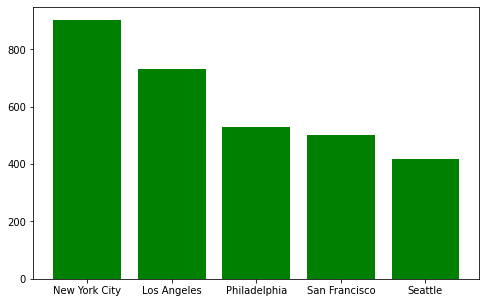

In [29]:
plt.figure(figsize=(8,5))
plt.bar(list(data['City'].value_counts()[0:5].keys()),list(data['City'].value_counts()[0:5]),color='g')
plt.show()

In [30]:
#Extracting rcords of the sales with only profit into the variables 'Only_profit'.

In [31]:
Only_profit=data[data['Profit']>=0]
Only_profit.head()

,City,State,Code,Category,Sub_Cat,Sales,Quantity,Discount,Profit
0,Henderson,Kentucky,42420,Furniture,Bookcases,261.960,2,0.0,41.9136
1,Henderson,Kentucky,42420,Furniture,Chairs,731.940,3,0.0,219.5820
2,Los Angeles,California,90036,Office Supplies,Labels,14.620,2,0.0,6.8714
4,Fort Lauderdale,Florida,33311,Office Supplies,Storage,22.368,2,0.2,2.5164
5,Los Angeles,California,90032,Furniture,Furnishings,48.860,7,0.0,14.1694


In [32]:
#Extracting records of the sales with only loss into the variables 'Only_loss'

In [33]:
Only_loss=data[data['Profit']<0]

In [34]:
Only_loss.head()

,City,State,Code,Category,Sub_Cat,Sales,Quantity,Discount,Profit
3,Fort Lauderdale,Florida,33311,Furniture,Tables,957.5775,5,0.45,-383.0310
14,Fort Worth,Texas,76106,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
15,Fort Worth,Texas,76106,Office Supplies,Binders,2.5440,3,0.80,-3.8160
23,Philadelphia,Pennsylvania,19140,Furniture,Chairs,71.3720,2,0.30,-1.0196
27,Philadelphia,Pennsylvania,19140,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522


In [35]:
#Histogram

In [36]:
#Distribution of sales using histogram

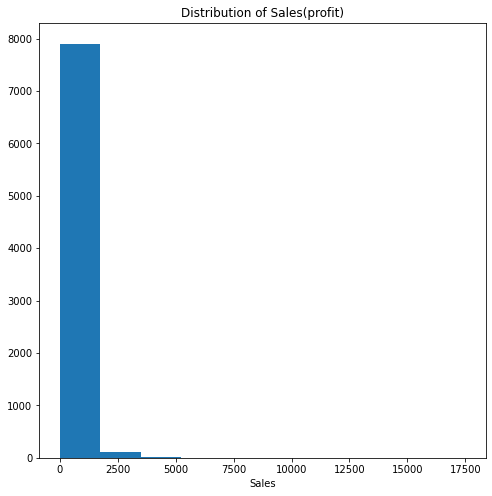

In [37]:
plt.figure(figsize=(8,8))
plt.hist(Only_profit['Sales'])
plt.title("Distribution of Sales(profit)")
plt.xlabel("Sales")
plt.show()

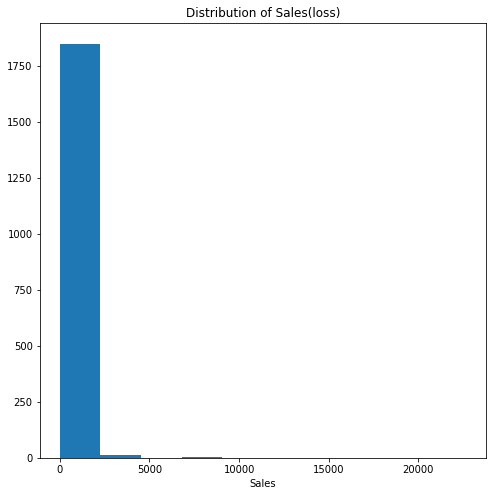

In [38]:
plt.figure(figsize=(8,8))
plt.hist(Only_loss['Sales'])
plt.title("Distribution of Sales(loss)")
plt.xlabel("Sales")
plt.show()

In [39]:
Only_profit['Sub_Cat'].value_counts()

Paper          1326
Binders         909
Art             790
Furnishings     788
Phones          750
Accessories     683
Storage         681
Appliances      399
Chairs          380
Labels          361
Envelopes       252
Fasteners       204
Supplies        155
Bookcases       119
Tables          115
Machines         71
Copiers          68
Name: Sub_Cat, dtype: int64

In [40]:
max(Only_profit['Profit'])

8399.976

In [41]:
Only_loss['Sub_Cat'].value_counts()

Binders        612
Chairs         234
Tables         203
Furnishings    165
Storage        161
Phones         136
Bookcases      109
Accessories     91
Appliances      67
Machines        44
Supplies        33
Fasteners       12
Name: Sub_Cat, dtype: int64

In [42]:
#Bar Plot

In [43]:
#Making a barplotfor top 3 sub categories with most profits.

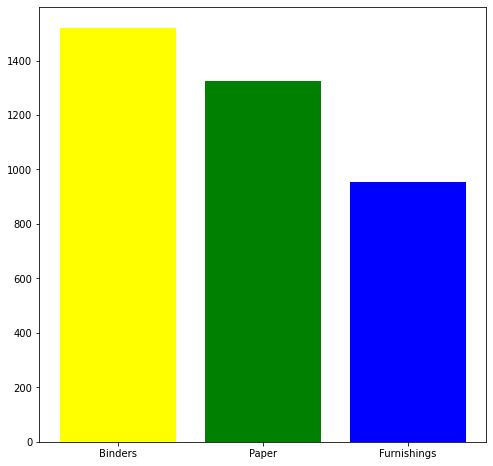

In [47]:
plt.figure(figsize=(8,8))
plt.bar(list(data['Sub_Cat'].value_counts()[0:3].keys()),list(data['Sub_Cat'].value_counts()[0:3]),color={"blue","yellow","green"})
plt.show()

C:\Users\user\AppData\Local\Temp/ipykernel_8392/864123187.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar()


<Figure size 1440x1440 with 0 Axes>

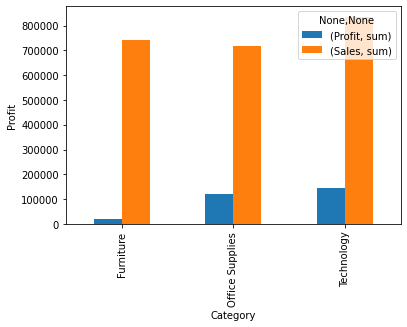

In [48]:
plt.figure(figsize=(20,20))
data.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.ylabel('Profit')
plt.show()

In [49]:
#Pie Chart

In [50]:
#Pie chart showing the percentage of each subcategory

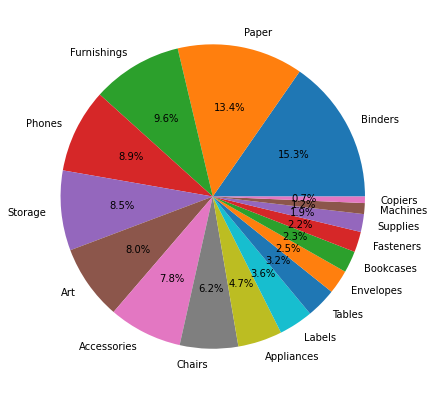

In [51]:
plt.figure(figsize=(7,7))
plt.pie(list(data['Sub_Cat'].value_counts()),labels=list(data['Sub_Cat'].value_counts().keys()),autopct='%.1f%%')
plt.show()

In [52]:
#Box-Plot

In [53]:
#Detecting Outliers with visualization using a box plot

<AxesSubplot:xlabel='Profit'>

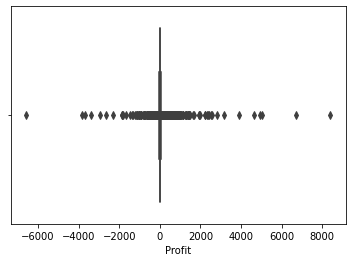

In [54]:
sns.boxplot(x=data['Profit'])

<AxesSubplot:xlabel='Sales'>

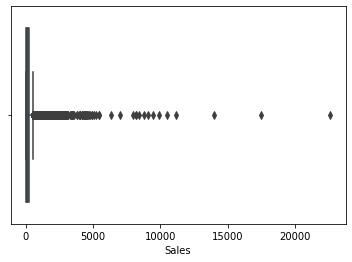

In [55]:
sns.boxplot(x=data['Sales'])

<AxesSubplot:xlabel='Discount'>

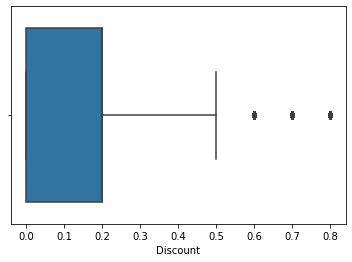

In [56]:
sns.boxplot(x=data['Discount'])

<AxesSubplot:xlabel='Quantity'>

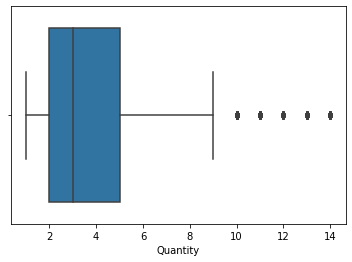

In [57]:
sns.boxplot(x=data['Quantity'])

In [58]:
#Removing the Outliers

In [61]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Code        66781.000000
Sales         193.262500
Quantity        3.000000
Discount        0.200000
Profit         27.868575
dtype: float64


In [62]:
#Heat Maps

In [63]:
#Finding relations between the variables using Heat Maps

,Code,Sales,Quantity,Discount,Profit
Code,1.000000,-0.023453,0.013812,0.060094,-0.029905
Sales,-0.023453,1.000000,0.200421,-0.028907,0.479033
Quantity,0.013812,0.200421,1.000000,0.007871,0.066081
Discount,0.060094,-0.028907,0.007871,1.000000,-0.220014
Profit,-0.029905,0.479033,0.066081,-0.220014,1.000000


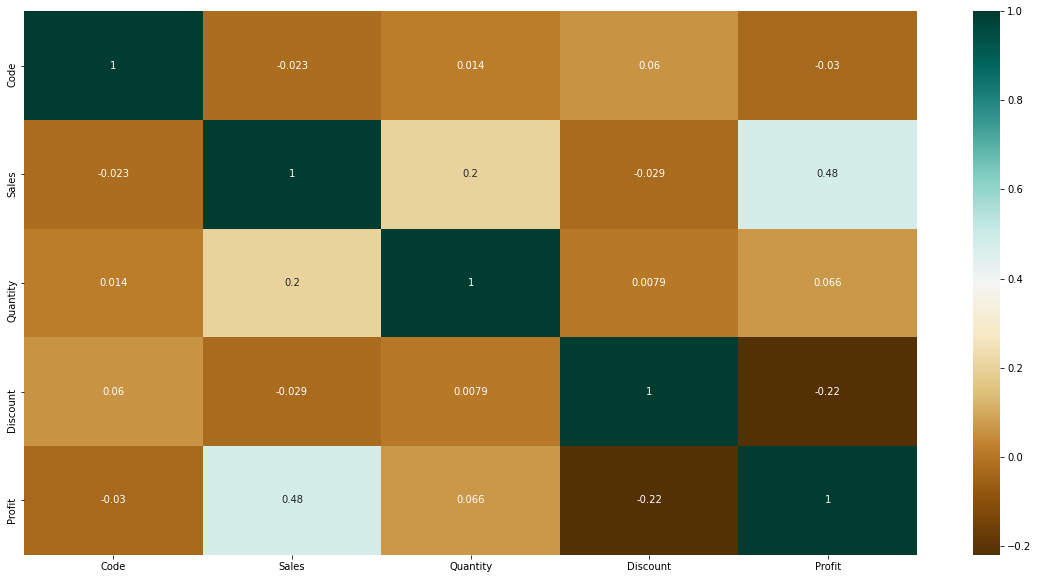

In [64]:
plt.figure(figsize=(20,10))
c=data.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [65]:
#Sales Vs Profit of 10 states

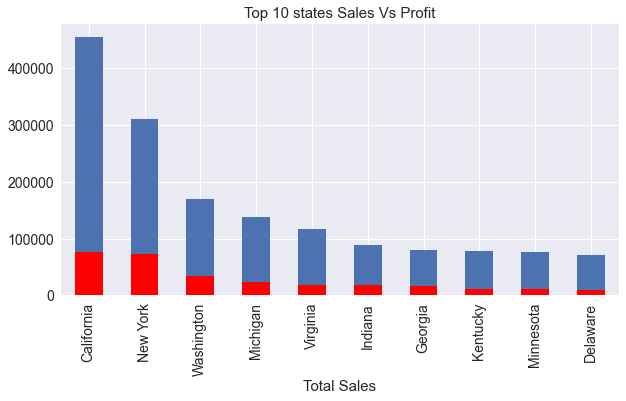

In [67]:
top_states_s=data.groupby("State").Sales.sum().nlargest(n=10)
top_states_p=data.groupby("State").Profit.sum().nlargest(n=10)
plt.style.use('seaborn')
top_states_s.plot(kind='bar',figsize=(10,5),fontsize=14)
top_states_p.plot(kind='bar',figsize=(10,5),fontsize=14,color='red')
plt.xlabel('States',fontsize=15)
plt.xlabel('Total Sales',fontsize=15)
plt.title("Top 10 states Sales Vs Profit",fontsize=15)
plt.show()

In [68]:
#Scatter Plot

In [69]:
#TO find the correlation betwwen two variables Sales and Profit

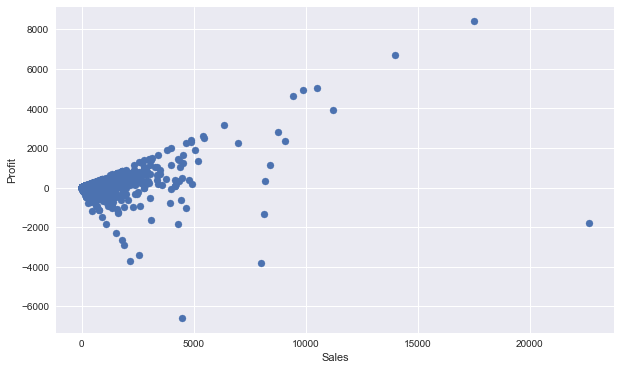

In [70]:
fig, ax=plt.subplots(figsize=(10,6))
ax.scatter(data['Sales'],data['Profit'])
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
plt.show()

In [71]:
#Pairplot

In [72]:
#Pairplot of all the attributes of the dataset

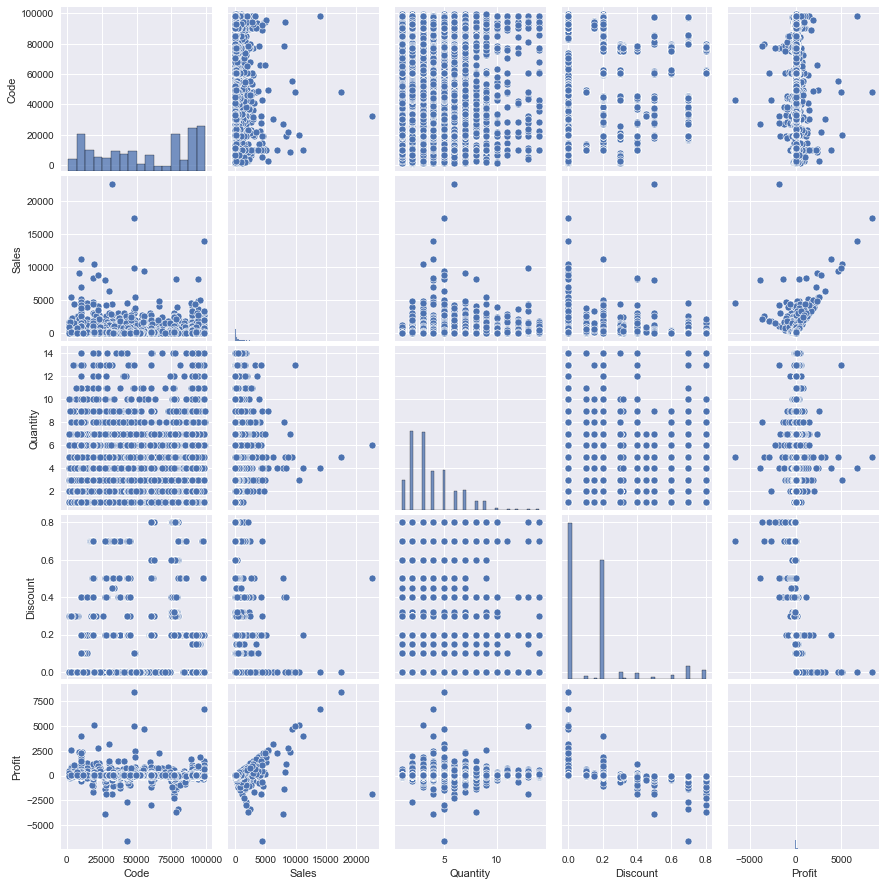

In [73]:
sns.pairplot(data)